<IPython.core.display.Javascript object>


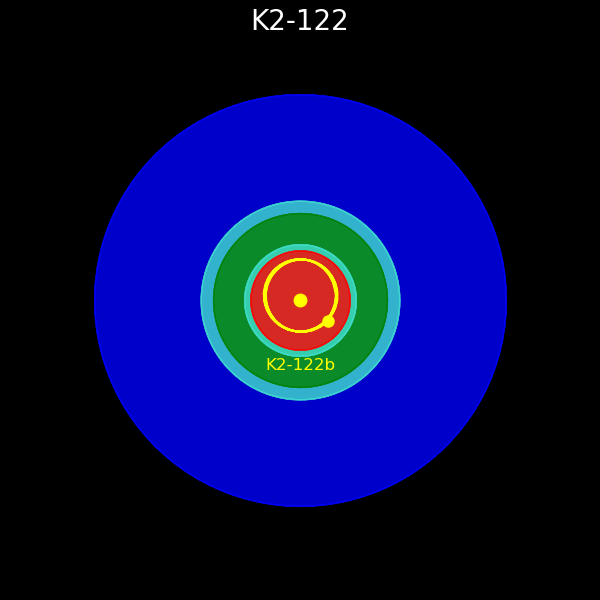

Star size is 0.6 Solar units
Star size is 0.05 map units
The inner limit is 0.262  AU; the outer limit is 0.408 AU


<IPython.core.display.Javascript object>


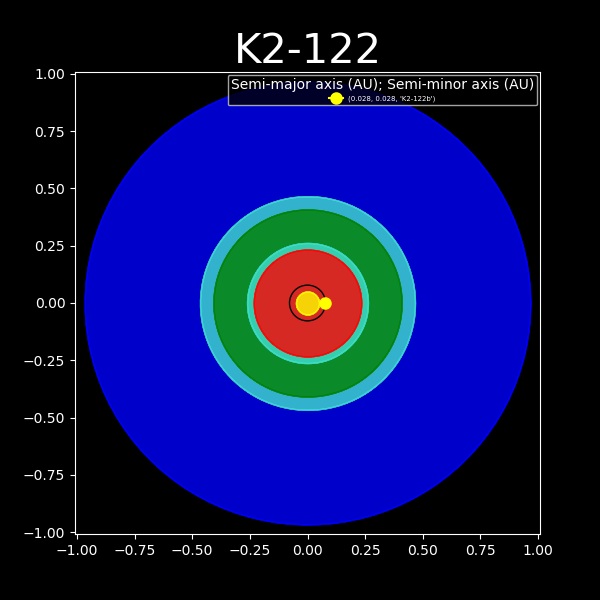

The exoplanets inlcude ['K2-122b']


,Surface Temperature (K),Jupyter-like?,Within Habitable Zone?,Habitable?
K2-122b,822.22,Smaller,No,No


In [141]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from astropy.time import Time

# imports
import matplotlib.pyplot as plt
import numpy as np
import random 
import pandas as pd
from random import sample
from matplotlib.patches import Ellipse


# importing and cleaning data
exoplanetdata = pd.read_csv('dataexoplanet.csv', skiprows = 18) 
exoplanetdata['st_lum'] = exoplanetdata['st_lum'].fillna(0) # changing nan values to 0 to compute missing luminosity values manually
exoplanetdata['pl_orbsmax'] = exoplanetdata['pl_orbsmax'].fillna(0) # changing nan values to 0 to compute missing semi-major axes values manually
exoplanetdata['pl_radj'] = exoplanetdata['pl_radj'].fillna(0.25) # changing nan values to 0.25 to have data for these missing values. While we cannot manually compute
# the missing data, the best alternative is to compute the median value of the given data, which is 0.25 R-Jupiter (makes sense because most undertermined radii should be small)
exoplanetdata['st_rad'] = exoplanetdata['st_rad'].fillna(1) # changing nan values to 1 because there is no way to compute missing star radii and 
# 1 solar radii is average star size
exoplanetdata['st_teff'] = exoplanetdata['st_teff'].fillna(5720) # Changing missing star temp to 5720 K because it is temp of Sun-like star which is considered average star
exoplanetdata['pl_orbper'] = exoplanetdata['pl_orbper'].fillna(1000) # Changing missing orbital periods to 1000 days; makes sense because confirmed exoplanets with these periods will be 
# difficult to confirm because of their lengths (less data to compute); also, no way otherwise to compute period
exoplanetdata['pl_orbeccen'] = exoplanetdata['pl_orbeccen'].fillna(0) # Changing missing ecc. values to 0 because it is likely that the planet will have near zero ecc. 
exoplanetdata['st_mass'] = exoplanetdata['st_mass'].fillna(1) # Changing star mass to 1 solar mass as this is considered average star mass
exoplanetdata['pl_bmassj'] = exoplanetdata['pl_bmassj'].fillna(0.25) # Changing missing planet mass to 0.25 mass-Jupiter because a planet with
# missing mass will most likely be smaller (like the radius).
exoplanetdata = exoplanetdata.set_index('pl_hostname') # changing index to iterate through host name (star)

sim_start_date = 0     # simulating a solar system starting from this date
sim_duration =  150               # (int) simulation duration in days


class Object():                   # define the objects
    def __init__(self, name, radius, color, r, v):
        self.name = name
        self.r    = np.array(r, dtype=np.float)
        self.v    = np.array(v, dtype=np.float)
        self.xs = []
        self.ys = []
        self.plot = ax.scatter(r[0], r[1], color=color, s=radius**2, edgecolors=None, zorder=10)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)

class PlanetarySystem():
    def __init__(self, star):
        self.star = star
        self.planets = []
        self.time = None
    def add_planet(self, planet):
        self.planets.append(planet)
    def evolve(self):           # evolve the trajectories
        timestep = 1.0
        self.time += timestep
        plots = []
        lines = []
        for p in self.planets:
            p.r += p.v * timestep
            acc = -2.959e-4 * p.r / np.sum(p.r**2)**(3./2)  # in units of AU/day^2
            p.v += acc * timestep
            p.xs.append(p.r[0])
            p.ys.append(p.r[1])
            p.plot.set_offsets(p.r[:2])
            p.line.set_xdata(p.xs)
            p.line.set_ydata(p.ys)
            plots.append(p.plot)
            lines.append(p.line)
        return plots + lines 

Star_name = exoplanetdata.sample(1)
Star_name = Star_name.index[0]



Kepler_star_data = exoplanetdata.loc[[Star_name]]


Star_Luminosity = []

if Kepler_star_data['st_lum'].iloc[0] == 0: 
    Star_Luminosity.append((Kepler_star_data['st_rad'].iloc[0]**2)*((Kepler_star_data['st_teff'].iloc[0]/5778)**4))

else:
    Star_Luminosity.append(10**(Kepler_star_data['st_lum'].iloc[0])) 

Star_Luminosity = str(Star_Luminosity)
Star_Luminosity =  Star_Luminosity.strip('[').strip(']')
Star_Luminosity = round(float(Star_Luminosity),3)

planet_axes_list = []
for i in range(len(Kepler_star_data['pl_orbsmax'])):
    if Kepler_star_data['pl_orbsmax'].iloc[i] == 0:
        planet_axes_list.append(round(((Kepler_star_data['pl_orbper'].iloc[i]/(365))**2)**(1/3),3)) # Based off T^2 = a^3 - nice approx. for now 

    else:
        planet_axes_list.append(round(Kepler_star_data['pl_orbsmax'].iloc[i],3))
planet_axes_list = sorted(planet_axes_list, key = lambda x:float(x))


Lsun = 1.0 # Luminosity of Sun (in Solar units)
d_inner = round(0.9*(np.sqrt(Star_Luminosity/Lsun)),3)
d_outer = round(1.4*(np.sqrt(Star_Luminosity/Lsun)),3)
d_inner_opt = round(0.8*(np.sqrt(Star_Luminosity/Lsun)),3)
d_outer_opt = round(1.6*(np.sqrt(Star_Luminosity/Lsun)),3)

planet_index = ['b','c','d','e','f','g','h','i','j','k']
planet_index_rows = []
for i in range(len(planet_axes_list)):
    index = Star_name + planet_index[i]
    planet_index_rows.append(index)

    # Eccentricity
Eccen = []
for i in range(len(planet_axes_list)):
    Eccen.append(Kepler_star_data['pl_orbeccen'].iloc[i])


semi_minor = []
for i in range(len(planet_axes_list)):
    semi_minor.append(round(planet_axes_list[i]*np.sqrt(1-Eccen[i]),3))

Planet_temp = []
A = 0.3 # albedo
for i in planet_axes_list:
    planet_temp = Kepler_star_data['st_teff'].iloc[0]*((Kepler_star_data['st_rad'].iloc[0]/(2*i*215.032))**(1/2)*(1-A)**(1/4))
    Planet_temp.append(round(planet_temp,2))


plt.style.use('dark_background')

fig = plt.figure(figsize=[6, 6])

if len(planet_axes_list) > 1 and planet_axes_list[-1] > d_outer:

    ax = plt.axes([0., 0., 1., 1.], xlim=(-planet_axes_list[-1]-1, planet_axes_list[-1]+1), ylim=(-planet_axes_list[-1]-1, planet_axes_list[-1]+1))
    title = ax.text(0, (planet_axes_list[-1]+1)*0.9, Star_name, fontsize=20, ha = 'center')

if len(planet_axes_list) == 1 and planet_axes_list[-1] > d_outer:

    ax = plt.axes([0., 0., 1., 1.], xlim=(-planet_axes_list[-1]-1, planet_axes_list[-1]+1), ylim=(-planet_axes_list[-1]-1, planet_axes_list[-1]+1))
    title = ax.text(0, (planet_axes_list[-1]+1)*0.9, Star_name, fontsize=20, ha = 'center')

elif len(planet_axes_list) > 1 and planet_axes_list[-1] < d_outer:

    ax = plt.axes([0., 0., 1., 1.], xlim=(-d_outer-1, d_outer+1), ylim=(-d_outer-1, d_outer+1))
    title = ax.text(0, (d_outer+1)*0.9, Star_name, fontsize=20, ha = 'center')

else:

    ax = plt.axes([0., 0., 1., 1.], xlim=(-d_outer-1, d_outer+1), ylim=(-d_outer-1, d_outer+1))
    title = ax.text(0, (d_outer+1)*0.9, Star_name, fontsize=20, ha = 'center')

ax = ax   
ax.set_aspect('equal')
ax.axis('off')
ss = PlanetarySystem(Object(Star_name, Kepler_star_data['st_rad'].iloc[0]*15, 'yellow', [0, 0, 0], [0, 0, 0]))
ss.time = sim_start_date

colors = ['gray', 'orange', 'blue', 'chocolate','grey','pink','yellow','green','blue','red'] # color of planet
colors = sample(colors, len(planet_axes_list))

sizes = []
for i in range(len(planet_axes_list)):
    if Kepler_star_data['pl_radj'].iloc[i] <= 5:

        sizes.append(8)

    else:
        sizes.append(10)


names = planet_index_rows


texty = []
for i in range(len(planet_axes_list)):
    texty.append(planet_axes_list[i]+(0.1*(i+1)))


pos = []
vel = []
for i in range(len(planet_axes_list)):
    if planet_axes_list[i] < 0.15:
        pos.append(([((i+1)*0.01475 + 0.15),0,0]))
        vel.append(([0,((np.sqrt((6.67E-11*(1*1.989E+30))/(((i+1)*0.01475 + 0.15)*1.496E+11))/1.731E+6)),0]))


    elif Kepler_star_data['st_mass'].iloc[0] < 0.75 and planet_axes_list[i] > 0.15:
        pos.append(([planet_axes_list[i],0,0]))
        vel.append(([0,((np.sqrt((6.67E-11*(1*1.989E+30))/(planet_axes_list[i]*1.496E+11))/1.731E+6)),0]))


    else:
        pos.append(([planet_axes_list[i],0,0]))
        vel.append(([0,((np.sqrt((6.67E-11*(Kepler_star_data['st_mass'].iloc[0]*1.989E+30))/(planet_axes_list[i]*1.496E+11))/1.731E+6)),0]))

    pass


theta = np.linspace(0., 2.*np.pi, 100, endpoint=True) # For circle

x_red = d_inner_opt*np.cos(theta) # Red zone
y_red = d_inner_opt*np.sin(theta)

x_green = d_outer*np.cos(theta) # Green zone
y_green = d_outer*np.sin(theta)

x_tur_i = d_inner*np.cos(theta) # Turq. zone - inner
y_tur_i = d_inner*np.sin(theta)

x_tur_o = d_outer_opt*np.cos(theta) # Turq. zone - outer
y_tur_o = d_outer_opt*np.sin(theta)

x_blue = (d_outer_opt+0.5)*np.cos(theta) # Blue zone
y_blue = (d_outer_opt+0.5)*np.sin(theta)


ax.fill_between(x_blue, y_blue, -y_blue, color='blue',alpha=0.8)
ax.fill_between(x_tur_o, y_tur_o, -y_tur_o, color='turquoise',alpha=0.8)
ax.fill_between(x_green, y_green, -y_green, color='green',alpha=0.8)
ax.fill_between(x_tur_i, y_tur_i, -y_tur_i, color='turquoise',alpha=0.8)
ax.fill_between(x_red, y_red, -y_red, color='red',alpha=0.8)


class generator():
    '''This class is designed to generate the habitable zones diagram for each star system'''

    def __init__(self):
        self = self
      
    
    def analysis(self):

        # star size (plot units; to show relative size of stars)
        Star_size = []

        if Kepler_star_data['st_rad'].iloc[0] >= 0 and Kepler_star_data['st_rad'].iloc[0] <= 1:
            Star_size.append(0.05)
        elif Kepler_star_data['st_rad'].iloc[0] > 1 and Kepler_star_data['st_rad'].iloc[0] <= 2:
            Star_size.append(0.15)
        elif Kepler_star_data['st_rad'].iloc[0] > 2 and Kepler_star_data['st_rad'].iloc[0] <= 5:
            Star_size.append(0.25)
        elif Kepler_star_data['st_rad'].iloc[0] > 5 and Kepler_star_data['st_rad'].iloc[0] <= 10:
            Star_size.append(0.35)
        elif Kepler_star_data['st_rad'].iloc[0] > 10:
            Star_size.append(0.45)

        Star_size = str(Star_size)
        Star_size =  Star_size.strip('[').strip(']')
        Star_size = float(Star_size)
        print('Star size is', Kepler_star_data['st_rad'].iloc[0],'Solar units')
        print('Star size is',Star_size,'map units')
        self.Star_size = Star_size
        
        # Number of exoplanets - not needed for now
        number_exo = Kepler_star_data['pl_pnum'].iloc[0]

        # Exoplanet's semi-major axes
        planet_axes_list = []
        for i in range(len(Kepler_star_data['pl_orbsmax'])):
            if Kepler_star_data['pl_orbsmax'].iloc[i] == 0:
                axis = (((((Kepler_star_data['pl_orbper'].iloc[i]*86400)**2)*(6.67E-11)*(Kepler_star_data['st_mass'].iloc[i]*2E+30 + Kepler_star_data['pl_bmassj'].iloc[i]*1.898E+27))/(4*np.pi**2))**(1/3))/1.496E+11
                planet_axes_list.append(round(axis,3)) 

            else:
                planet_axes_list.append(round(Kepler_star_data['pl_orbsmax'].iloc[i],3))
        planet_axes_list = sorted(planet_axes_list, key = lambda x:float(x))
        


  
        
        
        
   
        print('The inner limit is',d_inner,' AU; the outer limit is', d_outer, 'AU')


        
        
        # If planet is within 0 and 100 Celsius and within the 'green' zone
        
        Yes_No_list = []
        for i in range(len(Planet_temp)):
            if Planet_temp[i] >= 273 and Planet_temp[i] <= 373 and planet_axes_list[i] >= d_inner and planet_axes_list[i] <= d_outer:
                Yes = 'Yes'
                Yes_No_list.append(Yes)
            elif Planet_temp[i] >= 200 and Planet_temp[i] <=450 and planet_axes_list[i] >= d_inner and planet_axes_list[i] <= d_outer:
                Maybe = 'Likely'
                Yes_No_list.append(Maybe)
            else:
                No = 'No'
                Yes_No_list.append(No)
        
        self.Yes_No_list = Yes_No_list
        
        Yes_No_list_Zone = []
        for i in range(len(planet_axes_list)):
            if planet_axes_list[i] >= d_inner and planet_axes_list[i] <= d_outer:
                Yes = 'Yes'
                Yes_No_list_Zone.append(Yes)
            elif planet_axes_list[i] <= d_inner or planet_axes_list[i] >= d_outer:
                No = 'No'
                Yes_No_list_Zone.append(No)
        
        self.Yes_No_list_Zone = Yes_No_list_Zone
        
        Jupiter_list = []
        for i in range(len(planet_axes_list)):
            if Kepler_star_data['pl_radj'].iloc[i] < 0.5:
                Smaller = 'Smaller'
                Jupiter_list.append(Smaller)
            elif Kepler_star_data['pl_radj'].iloc[i] >= 0.5 and Kepler_star_data['pl_radj'].iloc[i] < 1.5:
                Yes = 'Yes'
                Jupiter_list.append(Yes)
            elif Kepler_star_data['pl_radj'].iloc[i] >= 1.5:
                Larger = 'Larger'
                Jupiter_list.append(Larger)
        
        self.Jupiter_list = Jupiter_list
    
        
    def plotting(self):
                

        # PLOTTING

        fig2, ax2 = plt.subplots(figsize=(6, 6)) 

            #set the limits of the figure (based on last inputted radii)
        ax2.set_xlim(-d_outer-0.6, d_outer+0.6) 
        ax2.set_ylim(-d_outer-0.6, d_outer+0.6) 
        
        xsun = (self.Star_size)*np.cos(theta) # Sun 
        ysun = (self.Star_size)*np.sin(theta)
            # Fill in habitability zones based off limits 
        ax2.fill_between(x_blue, y_blue, -y_blue, color='blue',alpha=0.8)
        ax2.fill_between(x_tur_o, y_tur_o, -y_tur_o, color='turquoise',alpha=0.8)
        ax2.fill_between(x_green, y_green, -y_green, color='green',alpha=0.8)
        ax2.fill_between(x_tur_i, y_tur_i, -y_tur_i, color='turquoise',alpha=0.8)
        ax2.fill_between(x_red, y_red, -y_red, color='red',alpha=0.8)
        ax2.fill_between(xsun, ysun, -ysun, color='yellow',alpha=0.8)
         
            # Setting up orbits
        Circle_list = []
        for i in range(len(planet_axes_list)):
            if planet_axes_list[i] > self.Star_size: 
                Circle_index = Ellipse((0,0), width = planet_axes_list[i]*2, height = semi_minor[i]*2 , color='black', fill=False)
                Circle_list.append(Circle_index)

            elif planet_axes_list[i] <= self.Star_size:
                Circle_index = Ellipse((0,0), width = (planet_axes_list[i] + (self.Star_size))*2 ,height = (semi_minor[i] + self.Star_size)*2,color='black', fill=False)
                Circle_list.append(Circle_index)

        # Display orbits
        for i in Circle_list:
            ax2.add_artist(i)

        marker_const_x = [1,-1,0,0,1,-1,0,0,1,-1]
        marker_position_x = []
        marker_position_x_sun = []
        for i in range(len(planet_axes_list)):
            marker_position_x.append(planet_axes_list[i]*marker_const_x[i])
            marker_position_x_sun.append((planet_axes_list[i]+(self.Star_size))*marker_const_x[i])

        marker_const_y = [0,0,1,-1,0,0,1,-1,0,0]
        marker_position_y = []
        marker_position_y_sun = []
        for i in range(len(planet_axes_list)):
            marker_position_y.append(semi_minor[i]*marker_const_y[i])
            marker_position_y_sun.append((semi_minor[i]+(self.Star_size))*marker_const_y[i])

        
        for i in range(len(planet_axes_list)):

            if planet_axes_list[i] > self.Star_size and Kepler_star_data['pl_radj'].iloc[i] <= 5:
                plt.plot(marker_position_x[i],marker_position_y[i],colors[i],ms = 8, label = (planet_axes_list[i],semi_minor[i],planet_index_rows[i]), alpha = 1, marker = 'o')

            elif planet_axes_list[i] > self.Star_size and Kepler_star_data['pl_radj'].iloc[i] > 5:
                plt.plot(marker_position_x[i],marker_position_y[i],colors[i],ms = 12, label = (planet_axes_list[i],semi_minor[i],planet_index_rows[i]), alpha = 1, marker = 'o')
                
            elif planet_axes_list[i] <= self.Star_size and Kepler_star_data['pl_radj'].iloc[i] <= 5:
                plt.plot(marker_position_x_sun[i],marker_position_y_sun[i],colors[i],ms =8, label = (planet_axes_list[i],semi_minor[i],planet_index_rows[i]), alpha = 1, marker = 'o')
            
            elif planet_axes_list[i] <= self.Star_size and Kepler_star_data['pl_radj'].iloc[i] > 5:
                plt.plot(marker_position_x_sun[i],marker_position_y_sun[i],colors[i],ms = 12, label = (planet_axes_list[i],semi_minor[i],planet_index_rows[i]), alpha = 1, marker = 'o')
        
        plt.legend(title="Semi-major axis (AU); Semi-minor axis (AU)",prop={'size': 5})
        plt.title(Star_name, fontsize=30)

        print('The exoplanets inlcude', planet_index_rows)
        
        Habitability = pd.DataFrame(data = list(zip(Planet_temp,self.Jupiter_list,self.Yes_No_list_Zone,self.Yes_No_list)),index = planet_index_rows, columns = ['Surface Temperature (K)','Jupyter-like?', 'Within Habitable Zone?','Habitable?'])
        display(Habitability)
        
        plt.show()





for i in range(len(planet_axes_list)):

    ss.add_planet(Object(names[i], sizes[i],colors[i],pos[i],vel[i]))

    ax.text(0, - (texty[i] + 0.2), names[i], color=colors[i], zorder=1000, ha='center', fontsize='large')

def animate(i):
    return ss.evolve()
ani = animation.FuncAnimation(fig, animate, repeat=False, frames=sim_duration, blit=True, interval=20,)
plt.show()

example = generator()
example.analysis()
example.plotting()


In [ ]:
fig2, ax2 = plt.subplots(figsize=(6, 6)) 

    #set the limits of the figure (based on last inputted radii)
ax2.set_xlim(-d_outer-0.6, d_outer+0.6) 
ax2.set_ylim(-d_outer-0.6, d_outer+0.6) 

    # Fill in habitability zones based off limits 
ax2.fill_between(x_blue, y_blue, -y_blue, color='blue',alpha=0.8)
ax2.fill_between(x_tur_o, y_tur_o, -y_tur_o, color='turquoise',alpha=0.8)
ax2.fill_between(x_green, y_green, -y_green, color='green',alpha=0.8)
ax2.fill_between(x_tur_i, y_tur_i, -y_tur_i, color='turquoise',alpha=0.8)
ax2.fill_between(x_red, y_red, -y_red, color='red',alpha=0.8)
ax2.fill_between(xsun, ysun, -ysun, color='yellow',alpha=0.8)

    # Setting up orbits
Circle_list = []
for i in range(len(planet_axes_list)):
    if planet_axes_list[i] > 0.3: 
        Circle_index = Ellipse((0,0), width = planet_axes_list[i]*2, height = semi_minor[i]*2 , color='black', fill=False)
        Circle_list.append(Circle_index)

    elif planet_axes_list[i] <= 0.3:
        Circle_index = Ellipse((0,0), width = (planet_axes_list[i] + (0.3))*2 ,height = (semi_minor[i] + 0.3)*2,color='black', fill=False)
        Circle_list.append(Circle_index)

# Display orbits
for i in Circle_list:
    ax2.add_artist(i)

    # Add planet (circle) marker
#colors_marker = ['bo','ro','go','co', 'mo', 'yo', 'ko','mo','co','yo'] # color of planet
#colors_marker = sample(colors_marker, len(planet_axes_list))

marker_const_x = [1,-1,0,0,1,-1,0,0,1,-1]
marker_position_x = []
marker_position_x_sun = []
for i in range(len(planet_axes_list)):
    marker_position_x.append(planet_axes_list[i]*marker_const_x[i])
    marker_position_x_sun.append((planet_axes_list[i]+(0.3))*marker_const_x[i])

marker_const_y = [0,0,1,-1,0,0,1,-1,0,0]
marker_position_y = []
marker_position_y_sun = []
for i in range(len(planet_axes_list)):
    marker_position_y.append(semi_minor[i]*marker_const_y[i])
    marker_position_y_sun.append((semi_minor[i]+(0.3))*marker_const_y[i])


for i in range(len(planet_axes_list)):
    if planet_axes_list[i] > 0.3 and Kepler_star_data['pl_radj'].iloc[i] < 0.5:
        plt.plot(marker_position_x[i],marker_position_y[i],colors[i],ms = 8, label = (planet_axes_list[i],semi_minor[i],planet_index_rows[i]), alpha = 1, marker = 'o')

    elif planet_axes_list[i] > 0.3 and Kepler_star_data['pl_radj'].iloc[i] >= 0.5 and Kepler_star_data['pl_radj'].iloc[i] < 1.5:
        plt.plot(marker_position_x[i],marker_position_y[i],colors[i],ms = 14, label = (planet_axes_list[i],semi_minor[i],planet_index_rows[i]), alpha = 1, marker = 'o')

    elif planet_axes_list[i] > 0.3 and Kepler_star_data['pl_radj'].iloc[i] >= 1.5:
        plt.plot(marker_position_x[i],marker_position_y[i],colors[i],ms = 20, label = (planet_axes_list[i],semi_minor[i],planet_index_rows[i]), alpha = 1, marker = 'o')   

    elif planet_axes_list[i] <= 0.3 and Kepler_star_data['pl_radj'].iloc[i] < 0.5:
        plt.plot(marker_position_x_sun[i],marker_position_y_sun[i],colors[i],ms = 8, label = (planet_axes_list[i],semi_minor[i],planet_index_rows[i]), alpha = 1, marker = 'o')

    elif planet_axes_list[i] <= 0.3 and Kepler_star_data['pl_radj'].iloc[i] >= 0.5 and Kepler_star_data['pl_radj'].iloc[i] < 1.5:
        plt.plot(marker_position_x_sun[i],marker_position_y_sun[i],colors[i],ms = 14, label = (planet_axes_list[i],semi_minor[i],planet_index_rows[i]), alpha = 1, marker = 'o')

    elif planet_axes_list[i] <= 0.3 and Kepler_star_data['pl_radj'].iloc[i] >= 1.5:
        plt.plot(marker_position_x_sun[i],marker_position_y_sun[i],colors[i],ms = 20, label = (planet_axes_list[i],semi_minor[i],planet_index_rows[i]), alpha = 1, marker = 'o')

plt.legend(title="Semi-major axis (AU); Semi-minor axis (AU)",prop={'size': 5})
plt.title(Star_name, fontsize=30)


<IPython.core.display.Javascript object>


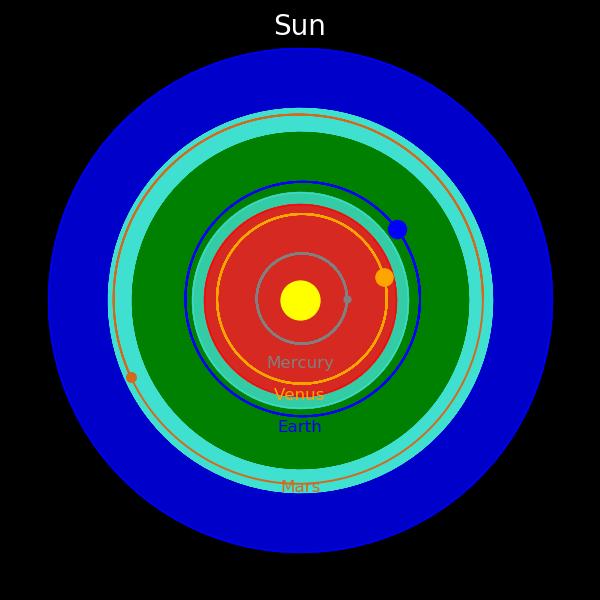

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from astropy.time import Time

sim_start_date = 0     # simulating a solar system starting from this date
sim_duration = 3 * 365                # (int) simulation duration in days


class Object:                   # define the objects
    def __init__(self, name, rad, color, r, v):
        self.name = name
        self.r    = np.array(r, dtype=np.float)
        self.v    = np.array(v, dtype=np.float)
        self.xs = []
        self.ys = []
        self.plot = ax.scatter(r[0], r[1], color=color, s=rad**2, edgecolors=None, zorder=10)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)

class SolarSystem:
    def __init__(self, thesun):
        self.thesun = thesun
        self.planets = []
        self.time = None
    def add_planet(self, planet):
        self.planets.append(planet)
    def evolve(self):           # evolve the trajectories
        dt = 1.0
        self.time += dt
        plots = []
        lines = []
        for p in self.planets:
            p.r += p.v * dt
            acc = -2.959e-4 * p.r / np.sum(p.r**2)**(3./2)  # in units of AU/day^2
            p.v += acc * dt
            p.xs.append(p.r[0])
            p.ys.append(p.r[1])
            p.plot.set_offsets(p.r[:2])
            p.line.set_xdata(p.xs)
            p.line.set_ydata(p.ys)
            plots.append(p.plot)
            lines.append(p.line)
        return plots + lines

Star_Luminosity = 1.0  
Lsun = 1.0 # Luminosity of Sun (in Solar units)
d_inner = round(0.9*(np.sqrt(Star_Luminosity/Lsun)),3)
d_outer = round(1.4*(np.sqrt(Star_Luminosity/Lsun)),3)
d_inner_opt = round(0.8*(np.sqrt(Star_Luminosity/Lsun)),3)
d_outer_opt = round(1.6*(np.sqrt(Star_Luminosity/Lsun)),3)

plt.style.use('dark_background')
fig = plt.figure(figsize=[6, 6])
ax = plt.axes([0., 0., 1., 1.], xlim=(-2.5, 2.5), ylim=(-2.5, 2.5))
ax.set_aspect('equal')
ax.axis('off')


theta = np.linspace(0., 2.*np.pi, 100, endpoint=True) # For circle

x_red = d_inner_opt*np.cos(theta) # Red zone
y_red = d_inner_opt*np.sin(theta)

x_green = d_outer*np.cos(theta) # Green zone
y_green = d_outer*np.sin(theta)

x_tur_i = d_inner*np.cos(theta) # Turq. zone - inner
y_tur_i = d_inner*np.sin(theta)

x_tur_o = d_outer_opt*np.cos(theta) # Turq. zone - outer
y_tur_o = d_outer_opt*np.sin(theta)

x_blue = (d_outer_opt+0.5)*np.cos(theta) # Blue zone
y_blue = (d_outer_opt+0.5)*np.sin(theta)

xsun = (0.3)*np.cos(theta) # Sun 
ysun = (0.3)*np.sin(theta)

ax.fill_between(x_blue, y_blue, -y_blue, color='blue',alpha=0.8)
ax.fill_between(x_tur_o, y_tur_o, -y_tur_o, color='turquoise',alpha=1)
ax.fill_between(x_green, y_green, -y_green, color='green',alpha=1)
ax.fill_between(x_tur_i, y_tur_i, -y_tur_i, color='turquoise',alpha=0.8)
ax.fill_between(x_red, y_red, -y_red, color='red',alpha=0.8)
ss = SolarSystem(Object("Sun", 28, 'yellow', [0, 0, 0], [0, 0, 0]))
#ss = SolarSystem(Object("Sun", 14, 'white', [-0.125, -0.15, 0], [0, 0, 0]))

ss.time = sim_start_date
colors = ['gray', 'orange', 'blue', 'chocolate', 'goldenrod']
sizes = [0.38, 0.95, 1., 0.53, 2.]
names = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter']
texty = [.47, .73, 1, 1.5, 5.4]

pos = [[0.39, 0,0],[0.723, 0,0],[1, 0,0],[1.524, 0,0],[10, 0,0]]
vel = [[0.0, 0.027,0],[0, 0.02,0],[0, 0.017,0],[0, 0.014,0],[0, 0.00076,0]]

ax.text(0, (d_outer_opt+1)*.85, 'Sun', fontsize=20, ha = 'center')

for i in range(5):  # The 1st, 2nd, 3rd, 4th planet in solar system
    ss.add_planet(Object(names[i], 13*sizes[i],colors[i],pos[i],vel[i]))
    ax.text(0, - (texty[i] + 0.1), names[i], color=colors[i], zorder=1000, ha='center', fontsize='large')
def animate(i):
    return ss.evolve()
ani = animation.FuncAnimation(fig, animate, repeat=False, frames=sim_duration, blit=True, interval=20,)
plt.show()

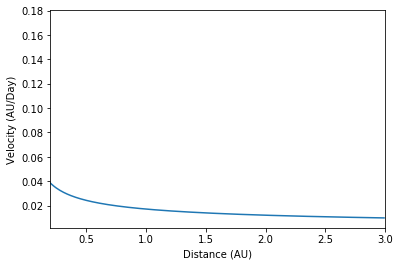

In [2]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.01,3,0.01)
orbvel = []
for i in x:
    orbvel.append(((np.sqrt((6.67E-11*(1*1.989E+30))/(i*1.496E+11))/1.731E+6)))
plt.plot(x,orbvel)
plt.xlabel('Distance (AU)')
plt.ylabel('Velocity (AU/Day)')
plt.xlim(0.2,3)
plt.show()